In [9]:
from jmd_imagescraper.core import *
from fastai.vision.all import *

In [14]:
import os
import requests
from fastai.vision.utils import download_url
from pathlib import Path
import json

def scrape_images(dest, labels, search_term, max_images=100):
    dest = Path(dest)
    dest.mkdir(exist_ok=True)
    
    for label in labels:
        print(f"Getting {label} images")
        results = bing_image_search(label, max_results=max_images)
        for i, url in enumerate(results):
            dest_path = dest / label / f"{search_term}_{i}.jpg"
            print(f"Downloading {url} to {dest_path}")
            download_url(url, dest_path)

def bing_image_search(query, max_results=100):
    subscription_key = "fc7a38ac18464aa79d547f7a188041d9"
    search_url = "https://api.bing.microsoft.com/v7.0/images/search"
    headers = {"Ocp-Apim-Subscription-Key" : subscription_key}
    params  = {"q": query, "license": "public", "imageType": "photo"}
    response = requests.get(search_url, headers=headers, params=params)
    response.raise_for_status()
    search_results = response.json()
    return [img["thumbnailUrl"] for img in search_results["value"]][:max_results]

labels = ['Iron Man Movie', 'Hulk Movie', 'Captain America Movie']
path = 'C:\\Users\\MAYANK PUVVALA\\Downloads\\jupyter\\heroes'
scrape_images(path, labels, 'movies', max_images=100)


Getting Iron Man Movie images


Getting Hulk Movie images


Getting Captain America Movie images


In [ ]:
# labels = 'grizzly','black','teddy'
# # path = scrape_images(Path('C:\Users\MAYANK PUVVALA\Downloads\jupyter\bears'), labels, 'bear', max_images=100)
# path = scrape_images(Path('C:\\Users\\MAYANK PUVVALA\\Downloads\\jupyter\\bears'), labels, 'bear', max_images=100)


In [15]:
heroes = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=0),
    get_y=parent_label,
    item_tfms=Resize(128))

C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


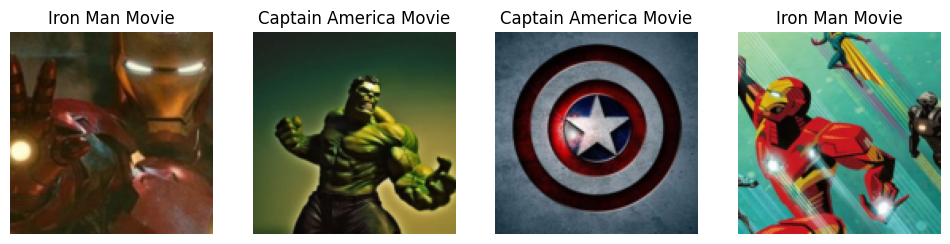

In [16]:
#collapse-output
dls = heroes.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

In [17]:
print(path)
dls = heroes.dataloaders(path)


C:\Users\MAYANK PUVVALA\Downloads\jupyter\heroes


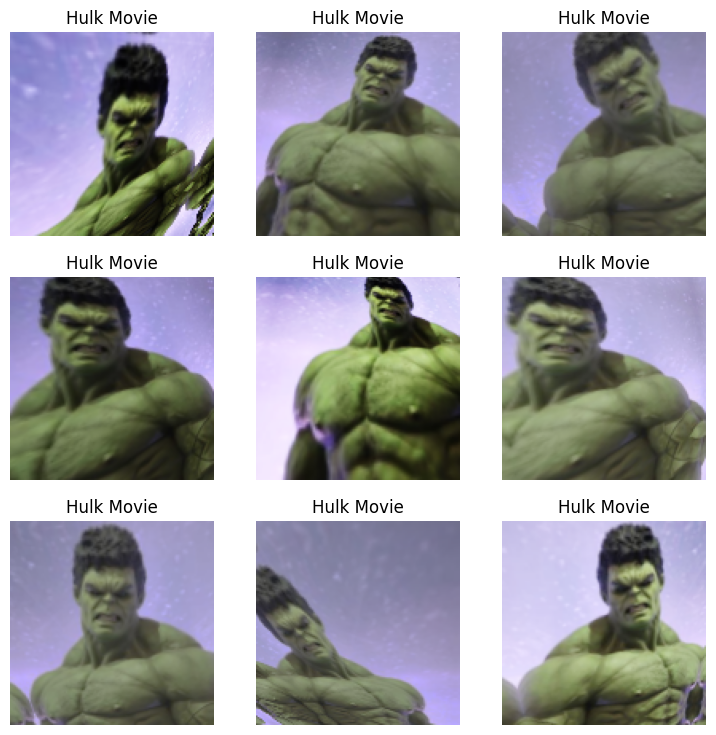

In [18]:
#collapse-output
heroes = heroes.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = heroes.dataloaders(path)
dls.train.show_batch(max_n=9, nrows=3, unique=True)

In [19]:
heroes = heroes.new(
    item_tfms=RandomResizedCrop(228, min_scale=0.5), 
    batch_tfms=aug_transforms())
dls = heroes.dataloaders(path)

In [24]:

learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,error_rate,time
0,1.856153,2.384196,0.952381,00:11


epoch,train_loss,valid_loss,error_rate,time
0,2.100136,2.051215,0.857143,00:15
1,2.102333,1.588641,0.714286,00:15
2,1.949381,1.415308,0.571429,00:15
3,1.718714,1.316833,0.523810,00:15


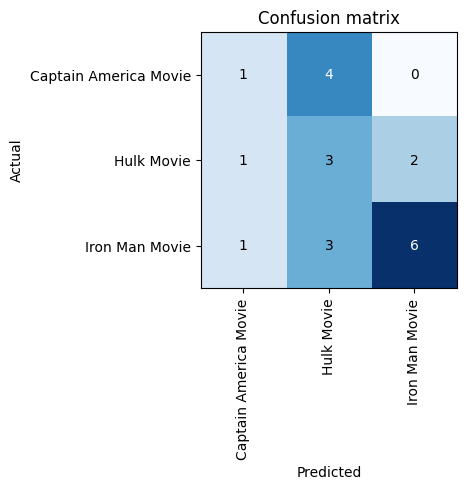

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


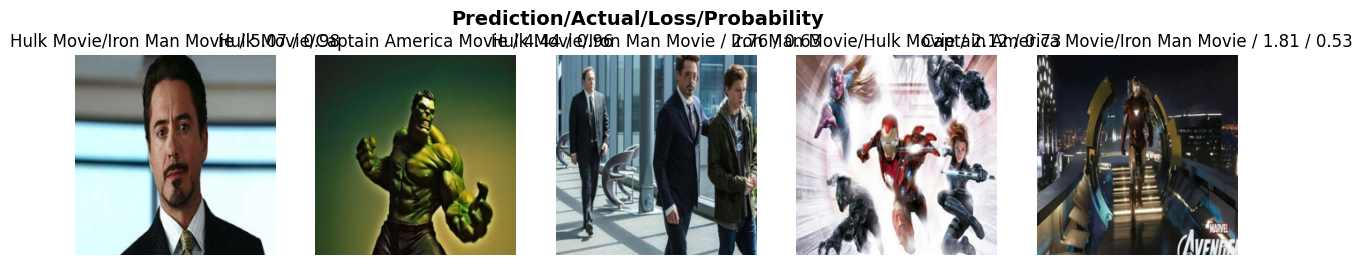

In [26]:
interp.plot_top_losses(5, nrows=1)

In [27]:
from fastai.vision.widgets import *

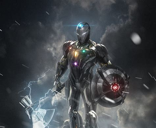

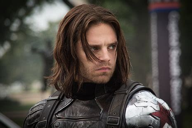

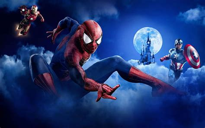

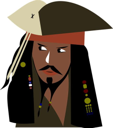

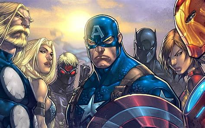

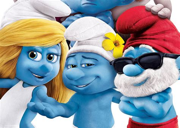

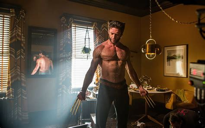

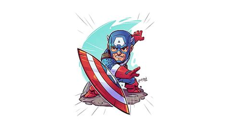

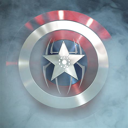

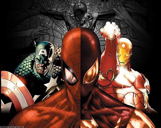

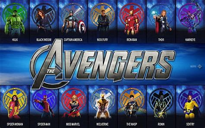

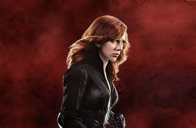

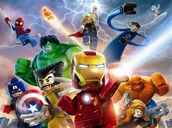

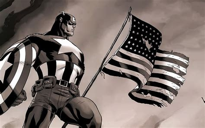

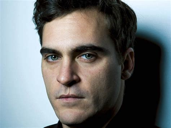

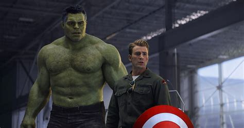

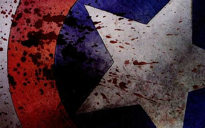

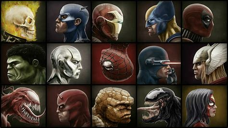

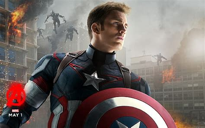

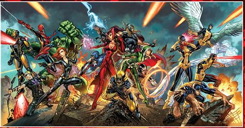

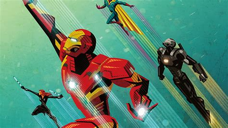

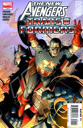

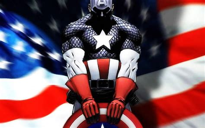

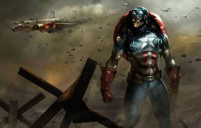

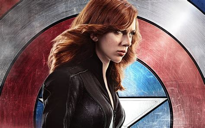

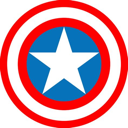

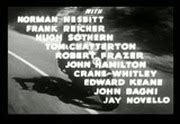

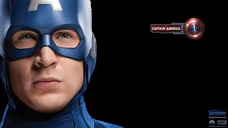

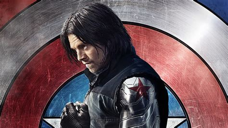

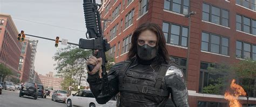

In [28]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [29]:
cleaner.delete(), cleaner.change()

((#0) [], (#0) [])

In [30]:
for idx in cleaner.delete() : cleaner.fns[idx].unlink()
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [31]:
heroes = heroes.new(
    item_tfms=RandomResizedCrop(228, min_scale=0.5), 
    batch_tfms=aug_transforms())
dls = heroes.dataloaders(path)

In [33]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,error_rate,time
0,2.245039,2.069765,0.619048,00:10


epoch,train_loss,valid_loss,error_rate,time
0,2.211480,1.796265,0.619048,00:14
1,2.094254,1.645540,0.714286,00:15
2,1.814513,1.487743,0.619048,00:15
3,1.704769,1.474302,0.571429,00:14


C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


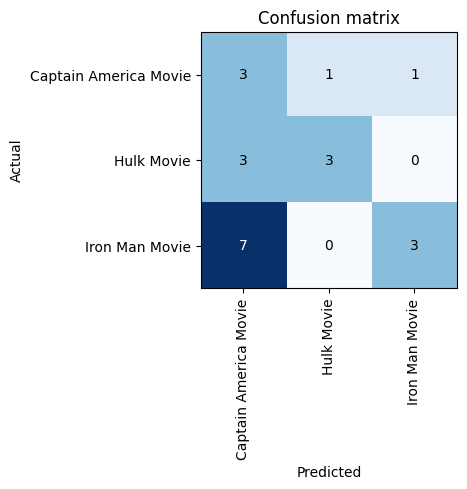

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [35]:
interp.print_classification_report()

C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


                       precision    recall  f1-score   support

Captain America Movie       0.23      0.60      0.33         5
           Hulk Movie       0.75      0.50      0.60         6
       Iron Man Movie       0.75      0.30      0.43        10

             accuracy                           0.43        21
            macro avg       0.58      0.47      0.45        21
         weighted avg       0.63      0.43      0.45        21



In [36]:
learn.export('C:\\Users\\MAYANK PUVVALA\\Downloads\\jupyter\\classy.pkl')

In [37]:
learn_inf = load_learner('C:\\Users\\MAYANK PUVVALA\\Downloads\\jupyter\\classy.pkl')

In [38]:
def get_prediction(model, image_location):
    return model.predict(image_location)

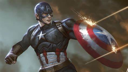

In [39]:
test_captain_image_location = 'C:\\Users\\MAYANK PUVVALA\\Downloads\\jupyter\\test_images\\captain.jpg'
im = Image.open(test_captain_image_location)
im.to_thumb(128,128)

In [40]:
pred, pred_idx, probs = get_prediction(learn_inf, test_captain_image_location)
f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


'Prediction: Captain America Movie; Probability: 0.8960'

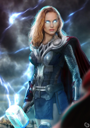

In [41]:
test_thory_image_location = 'C:\\Users\\MAYANK PUVVALA\\Downloads\\jupyter\\test_images\\thory.jpg'
im = Image.open(test_thory_image_location)
im.to_thumb(128,128)

In [42]:
pred, pred_idx, probs = get_prediction(learn_inf, test_thory_image_location)
f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

'Prediction: Iron Man Movie; Probability: 0.6830'

In [43]:
# import gradio as gr

# def gradio_predict(img):
#     pred, pred_idx, probs =  learn_inf.predict(img)    
#     return {learn_inf.dls.vocab[i]: float(probs[i]) for i in range(len(probs))}
    
# label = gradio.components.Label(num_top_classes=4)

In [44]:

# inputs = gr.inputs.Image()
# iface = gr.Interface(fn=gradio_predict, inputs=inputs, outputs=label)


# # iface = gr.Interface(fn=gradio_predict,
# #                      inputs=gr.inputs.Image(),
# #                      outputs=label)
# iface.launch(share=True)

In [45]:
# inputs = gradio.inputs.Image()
# outputs = gradio.outputs.Label(num_top_classes=3)
# iface = gradio.Interface(fn=gradio_predict, inputs=inputs, outputs=outputs)

# iface.launch(share=True)

In [46]:
# from flask import Flask, request
# from PIL import Image
# from io import BytesIO
# import base64

# app = Flask(__name__)

# @app.route('/predict', methods=['POST'])
# def predict():
#     data = request.json
#     img_data = data['image']
#     img_data = base64.b64decode(img_data)
#     img = Image.open(BytesIO(img_data))
    
#     pred, pred_idx, probs = learn_inf.predict(img)
#     result = {learn_inf.dls.vocab[i]: float(probs[i]) for i in range(len(probs))}
    
#     return result

# if __name__ == '__main__':
#     app.run(debug=True)


In [47]:
import gradio as gr

def gradio_predict(img):
    pred, pred_idx, probs =  learn_inf.predict(img)    
    return {learn_inf.dls.vocab[i]: float(probs[i]) for i in range(len(probs))}
    
label = gr.Label(num_top_classes=4)
inputs = gr.Image()
iface = gr.Interface(fn=gradio_predict, inputs=inputs, outputs=label)
iface.launch(share=True)


Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
